In [1]:
import pandas as pd
import matplotlib
import json
import numpy as np
from altair import datum
import altair as alt
alt.renderers.enable('notebook')
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [2]:
# https://data.lacounty.gov/Human-Resources/LA-County-Employee-Salaries/8rdv-6nb6
src = pd.read_csv('/Users/mhustiles/data/data/LA/LA_County_Employee_Salaries.csv')

In [3]:
payroll = src

In [4]:
payroll.columns = payroll.columns.str.strip().str.lower().str.replace(' ', '_')\
    .str.replace('(', '').str.replace(')', '')

In [5]:
payroll_grouped = payroll.groupby(['employee_name', 'department']).agg('size')\
    .sort_values(ascending=False).reset_index(name='total')

In [51]:
payroll_person = payroll[(payroll['employee_last_name'] == 'BURCIAGA') \
                         & (payroll['employee_first_name'] == 'SERGIO') ]

In [52]:
payroll_person.to_csv('payroll_person.csv')

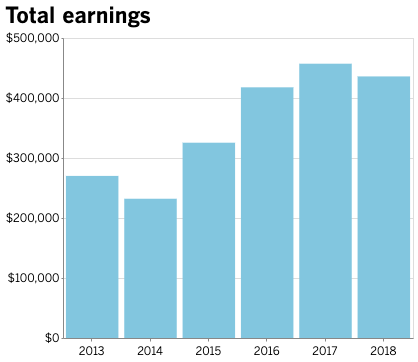

In [53]:
alt.Chart(payroll_person).mark_bar().encode(
    x=alt.X('year:N', title=''),
    y=alt.Y('total_earnings:Q', title='', axis=alt.Axis(format='$,N', tickCount=5))
).properties(width=350,height=300, title='Total earnings')